In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customerattributiondata/Customerattributiondata.csv


In [14]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data into a DataFrame named dstv and change the name Customerattributiondata

dstv =pd.read_csv('/kaggle/input/customerattributiondata/Customerattributiondata.csv', sep='\t')

# EDA for dstv dataset
#print(dstv.describe())
print(dstv.info())
print(dstv.head())
#print(dstv.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13304 entries, 0 to 13303
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUSTOMERID            13304 non-null  object 
 1   SESSIONID             13014 non-null  object 
 2   TIMESTAMP_TOUCHPOINT  13014 non-null  object 
 3   MARKETINGCHANNEL      13014 non-null  object 
 4   REVENUE               1142 non-null   float64
dtypes: float64(1), object(4)
memory usage: 519.8+ KB
None
         CUSTOMERID                                 SESSIONID  \
0  955200d89b1a4cb0  f1017e8a41ed16a744786a7a74776d2f5c45fde8   
1  e4067a9e62ec1936  d832ffe450a04918a5bddd80a9ec9fcb9a5e2815   
2  8a48e8219b6c1a29  c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522   
3  ef2206d490330882  b0130ba2203b0451a6686d2b1b7216f982a0b8a8   
4  b2dde47737c3b716  ac583684bfbe09bd16d73dd40ba584f38638ea1a   

  TIMESTAMP_TOUCHPOINT  MARKETINGCHANNEL  REVENUE  
0  2019-12-30 16:40:36  Direct_NO

In [5]:
# Check for missing values
print(dstv.isna().any())
print(len(dstv[dstv['REVENUE'].isna()]))
print(len(dstv[dstv['TIMESTAMP_TOUCHPOINT'].isna()]))
print(len(dstv['CUSTOMERID'].unique()))
print(len(dstv[dstv.duplicated('CUSTOMERID')]))

CUSTOMERID              False
SESSIONID                True
TIMESTAMP_TOUCHPOINT     True
MARKETINGCHANNEL         True
REVENUE                  True
dtype: bool
12162
290
10044
3260


In [6]:
# Verify number of observations and variables
print(len(dstv))
print(len(dstv.columns))

13304
5


In [7]:
# Print the names for the header
print(dstv)


             CUSTOMERID                                 SESSIONID  \
0      955200d89b1a4cb0  f1017e8a41ed16a744786a7a74776d2f5c45fde8   
1      e4067a9e62ec1936  d832ffe450a04918a5bddd80a9ec9fcb9a5e2815   
2      8a48e8219b6c1a29  c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522   
3      ef2206d490330882  b0130ba2203b0451a6686d2b1b7216f982a0b8a8   
4      b2dde47737c3b716  ac583684bfbe09bd16d73dd40ba584f38638ea1a   
...                 ...                                       ...   
13299  d0d146c631efb84f  87937035cba9f1b7668dba6ec65c326f72a25139   
13300  99467aa6cbe3f430  e0cd11c616cd60b452482f8afe1f647116162d25   
13301  0ae5f29809695ec5  17941cba1edd3dc3913ec3adcadb23e165863dff   
13302  3bb38a0777496b70  cc561acd4d2ed7d93f69105e6923e72b852b2e67   
13303  7d122ad4fd345cfb  f2f8463705aec4d96bab88f1f0669e65ec99a0f2   

      TIMESTAMP_TOUCHPOINT  MARKETINGCHANNEL  REVENUE  
0      2019-12-30 16:40:36  Direct_NON-BRAND      NaN  
1      2019-12-27 17:50:37  Direct_NON-BRAND      NaN  
2  

# Preprocessing the data

In [8]:
# Removing SEA-NON-BRAND FROM MARKETINGCHANNEL AND ALSO CORRECTING MISPELLED NAMES LIKE
# ADWORDS/

# Removing rows where MARKETINGCHANNEL is "SEA_NON-BRAND" and CUSTOMERID is "SEA_NON-BRAND"
dstv = dstv[dstv['MARKETINGCHANNEL'] != "SEA_NON-BRAND"]
dstv = dstv[dstv['CUSTOMERID'] != "SEA_NON-BRAND"]

# Correcting misspelled name "Adwords/" to "Adwords" in MARKETINGCHANNEL
dstv['MARKETINGCHANNEL'] = dstv['MARKETINGCHANNEL'].str.replace("Adwords/", "Adwords")

# When the revenue is NA it should be 0 for data preparation and easy to read.
dstv['REVENUE'].fillna(0, inplace=True)

# Correcting typo in MARKETINGCHANNEL "SEA_NON-BRAND\"" to "SEA_NON-BRAND"
dstv['MARKETINGCHANNEL'] = dstv['MARKETINGCHANNEL'].str.replace("SEA_NON-BRAND\"", "SEA_NON-BRAND")


In [9]:
# Assuming 'TIMESTAMP_TOUCHPOINT' column is in string format
dstv['TIMESTAMP_TOUCHPOINT'] = pd.to_datetime(dstv['TIMESTAMP_TOUCHPOINT'], format='%Y-%m-%d %H:%M:%S')


# Display the DataFrame
print(dstv.head())

         CUSTOMERID                                 SESSIONID  \
0  955200d89b1a4cb0  f1017e8a41ed16a744786a7a74776d2f5c45fde8   
1  e4067a9e62ec1936  d832ffe450a04918a5bddd80a9ec9fcb9a5e2815   
2  8a48e8219b6c1a29  c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522   
3  ef2206d490330882  b0130ba2203b0451a6686d2b1b7216f982a0b8a8   
4  b2dde47737c3b716  ac583684bfbe09bd16d73dd40ba584f38638ea1a   

  TIMESTAMP_TOUCHPOINT  MARKETINGCHANNEL  REVENUE  
0  2019-12-30 16:40:36  Direct_NON-BRAND      0.0  
1  2019-12-27 17:50:37  Direct_NON-BRAND      0.0  
2  2020-01-19 13:41:55         SEO_BRAND      0.0  
3  2019-12-15 10:32:40         SEO_BRAND      0.0  
4  2020-01-10 23:52:27          Referral      0.0  


In [10]:
# dstv is my DataFrame
df_data = dstv.sort_values(by=['CUSTOMERID', 'TIMESTAMP_TOUCHPOINT'])

# Group by CUSTOMERID
grouped_data = df_data.groupby('CUSTOMERID')

# Calculate cumsum(REVENUE) and lag by one row
df_data['path_no'] = grouped_data['REVENUE'].cumsum().shift(fill_value=0) + 1

# Add path_id column
df_data['path_id'] = df_data['CUSTOMERID'].astype(str) + df_data['path_no'].astype(str)

# Display the DataFrame
print(df_data)

             CUSTOMERID                                 SESSIONID  \
6158   0002759882f3724f  2df59a3cd2cdf7d06694fc56ba6ec798a1c835b9   
6465   000af8f6d9aef9f3  209638bd0565f1ca365b0816e26805d787b51bb5   
7050   000e2b58b4e3a1de  1318dd3140df3d391d1d6c525f0abe78219b667f   
8582   000effa1cf4ea117  93571e674f7b66bfaf21bc5d0fdc9ae427ea2318   
7407   001513f39ca7448a  94ddc2fd1e6c93c431852783115987e6ca4d85b2   
...                 ...                                       ...   
13158  ffd92a1bee90652c  528cd6bc0440de0bee8cf24f81741aedf4583e62   
224    ffd92a1bee90652c  b9f20f189ef805e4eeca8eb0736be5f7fa515dff   
10872  ffe3d2b4ffa544a0  e46d277a01168a2e18c7ba4cd8dba014e6be8360   
4907   ffe8ca2b9414bfe6  1294b5d8763cc4932c99938cd1d6cd17f3fbfa6e   
12693  fff79a660283ed02  e9cf96d25a8cd71a6e7ad0929547c529224405df   

      TIMESTAMP_TOUCHPOINT  MARKETINGCHANNEL  REVENUE  path_no  \
6158   2020-01-05 19:54:24  Direct_NON-BRAND      0.0      1.0   
6465   2019-12-29 12:56:18  Direct_NON-

In [11]:

data_paths = df_data.sort_values(by=['path_id', 'TIMESTAMP_TOUCHPOINT'])

# Group by path_id
grouped_paths = data_paths.groupby('path_id')

# Create 'path' column by concatenating 'MARKETINGCHANNEL' with '>'
data_paths['path'] = grouped_paths['MARKETINGCHANNEL'].transform(lambda x: '>'.join(map(str, x)))

# Create 'total_revenue' column by summing 'REVENUE'
data_paths['total_revenue'] = grouped_paths['REVENUE'].transform('sum')

# Create 'null_revenue' column based on the condition
data_paths['null_revenue'] = np.where(data_paths['total_revenue'] == 1, 0, 1)

# Drop duplicate rows based on 'path_id'
data_paths = data_paths.drop_duplicates(subset=['path_id'])

# Display the resulting DataFrame
print(data_paths[['path_id', 'path', 'total_revenue', 'null_revenue']])



                      path_id                                    path  \
6158      0002759882f3724f1.0                        Direct_NON-BRAND   
6465      000af8f6d9aef9f31.0                        Direct_NON-BRAND   
7050      000e2b58b4e3a1de1.0                                Referral   
8582      000effa1cf4ea1171.0                               SEO_BRAND   
7407      001513f39ca7448a1.0                        Direct_NON-BRAND   
...                       ...                                     ...   
7333      ffd7469300e1a8601.0                           SEO_NON-BRAND   
860       ffd92a1bee90652c1.0  SEO_BRAND>SEO_BRAND>SEO_BRAND>Referral   
10872     ffe3d2b4ffa544a01.0                        Direct_NON-BRAND   
4907      ffe8ca2b9414bfe61.0                               SEO_BRAND   
12693  fff79a660283ed021001.0                                Referral   

       total_revenue  null_revenue  
6158             0.0             1  
6465             0.0             1  
7050        

In [12]:
#dstv is my DataFrame
dstv = dstv.sort_values(by=['CUSTOMERID', 'TIMESTAMP_TOUCHPOINT'])

# Calculate the time differences between TIMESTAMP_TOUCHPOINT
dstv['Time_Difference'] = dstv.groupby('CUSTOMERID')['TIMESTAMP_TOUCHPOINT'].diff().dt.total_seconds() / 3600

# Replace NA values in Time_Difference with 0 (for the last touchpoint)
dstv['Time_Difference'].fillna(0, inplace=True)

# Calculate weights based on time decay
decay_factor = 0.1
dstv['Weight'] = np.exp(-decay_factor * dstv['Time_Difference'])

# Calculate the attributed revenue for each customer id
dstv['Attributed_Revenue'] = dstv['REVENUE'] * dstv['Weight']


# Group by 'MARKETINGCHANNEL' and summarize 'Total_Attributed_Revenue'
attribution_result = dstv.groupby('MARKETINGCHANNEL')['Attributed_Revenue'].sum().reset_index()


# Print the result
print(attribution_result)

                 MARKETINGCHANNEL  Attributed_Revenue
0                Direct_NON-BRAND       365879.391002
1                        Referral       156623.615320
2              Referral_NON-BRAND         1000.000000
3                       SEO_BRAND       315055.842568
4                   SEO_NON-BRAND       111372.468489
5  Social Media organic_NON-BRAND          903.857708


Visuals

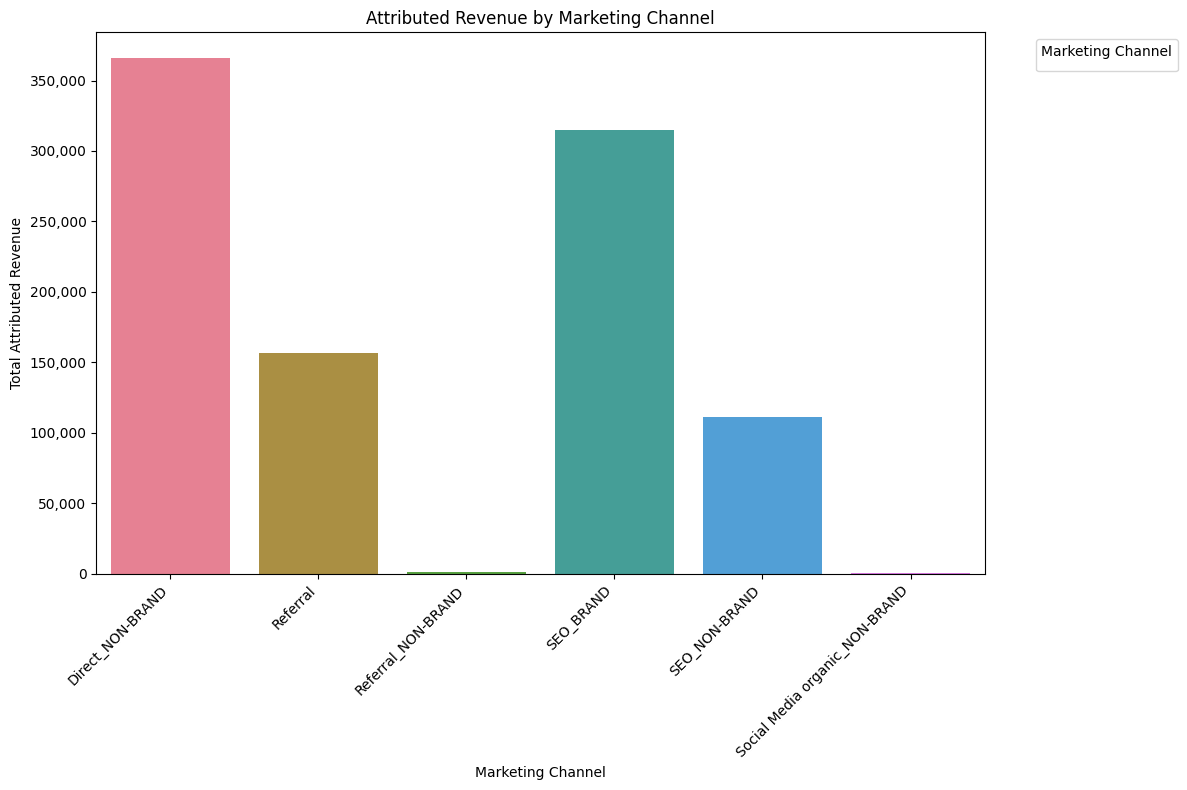

In [16]:

# Create a color palette with rainbow colors
color_palette = sns.color_palette("husl", n_colors=len(attribution_result_filtered['MARKETINGCHANNEL'].unique()))

# Bar plot with improved aesthetics
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='MARKETINGCHANNEL',
                       y='Attributed_Revenue',
                       data=attribution_result_filtered,
                       palette=color_palette)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Format y-axis labels with commas for thousands separator
bar_plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

# Set plot title and axis labels
plt.title('Attributed Revenue by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Total Attributed Revenue')

# Show legend on the right
plt.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


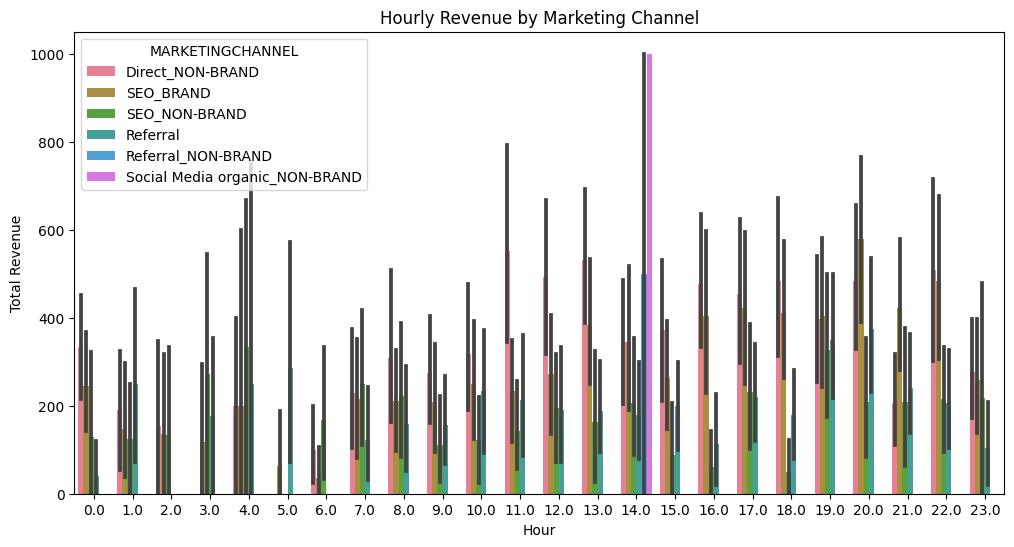

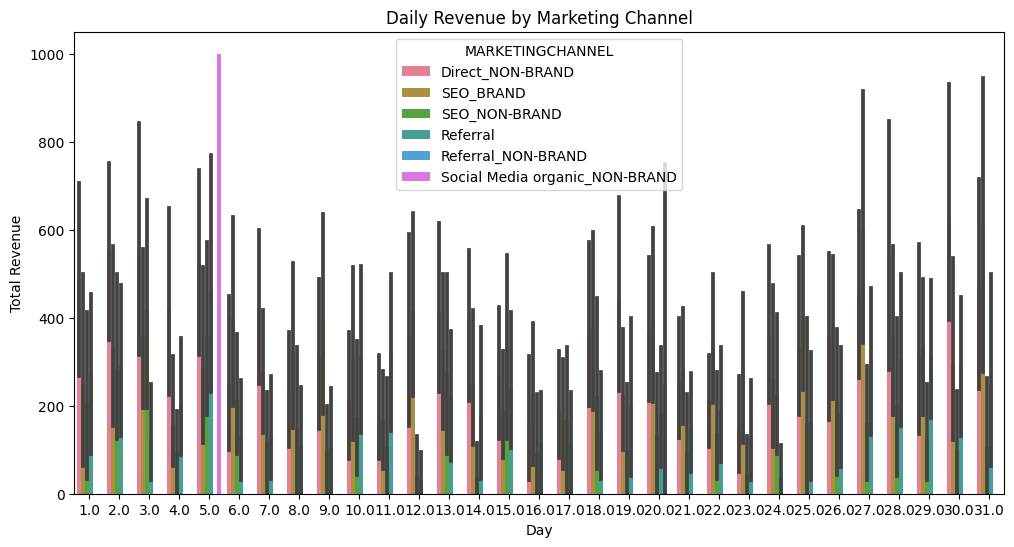

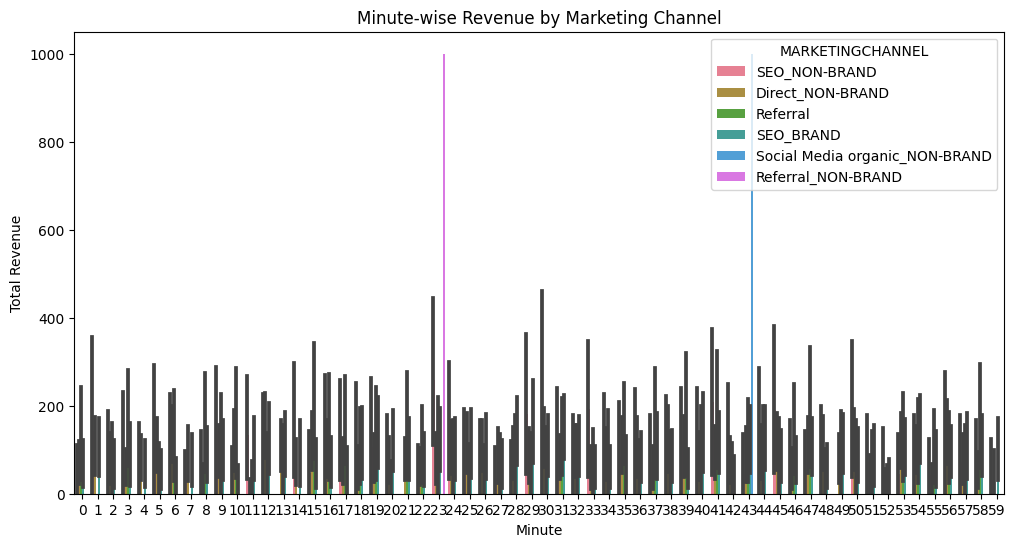

In [17]:


# Removing rows where MARKETINGCHANNEL is SEA_NON-BRAND
dstv = dstv[dstv['MARKETINGCHANNEL'] != 'SEA_NON-BRAND']
dstv = dstv[dstv['CUSTOMERID'] != 'SEA_NON-BRAND"']

# Correcting mispelled names
dstv['MARKETINGCHANNEL'] = dstv['MARKETINGCHANNEL'].replace({"Adwords/": "Adwords"})
dstv['MARKETINGCHANNEL'] = dstv['MARKETINGCHANNEL'].replace({"SEA_NON-BRAND\"": "SEA_NON-BRAND"})

# Replacing NA values in REVENUE with 0
dstv['REVENUE'].fillna(0, inplace=True)

# Preprocessing the data
dstv_cookies = dstv.melt(id_vars=['CUSTOMERID', 'TIMESTAMP_TOUCHPOINT', 'REVENUE'], var_name='cookies', value_name='count_cookies')
dstv_cookies.drop(columns=['cookies'], inplace=True)

# Converting TIMESTAMP_TOUCHPOINT to POSIX format
dstv['time_posix'] = pd.to_datetime(dstv['TIMESTAMP_TOUCHPOINT'])
dstv['year'] = dstv['time_posix'].dt.year
dstv['month'] = dstv['time_posix'].dt.month
dstv['day'] = dstv['time_posix'].dt.day
dstv['hour'] = dstv['time_posix'].dt.hour

data_time = dstv.groupby(['year', 'month', 'day', 'hour', 'MARKETINGCHANNEL']).agg(count=('CUSTOMERID', 'count'), total_revenue=('REVENUE', 'sum')).reset_index()

# Visualization using Hour with Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='total_revenue', hue='MARKETINGCHANNEL', data=data_time, palette='husl', dodge=True)
plt.title('Hourly Revenue by Marketing Channel')
plt.xlabel('Hour')
plt.ylabel('Total Revenue')
plt.show()

# Visualization using Day with Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='total_revenue', hue='MARKETINGCHANNEL', data=data_time, palette='husl', dodge=True)
plt.title('Daily Revenue by Marketing Channel')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.show()

# Visualization using Minute with Revenue
dstv_count_cookies = dstv.groupby(['day', 'hour', 'time_posix', 'MARKETINGCHANNEL']).agg(count=('CUSTOMERID', 'count'), revenue=('REVENUE', 'sum')).reset_index()
dstv_count_cookies['minute'] = dstv_count_cookies['time_posix'].dt.minute

plt.figure(figsize=(12, 6))
sns.barplot(x='minute', y='revenue', hue='MARKETINGCHANNEL', data=dstv_count_cookies, palette='husl', dodge=True)
plt.title('Minute-wise Revenue by Marketing Channel')
plt.xlabel('Minute')
plt.ylabel('Total Revenue')
plt.show()


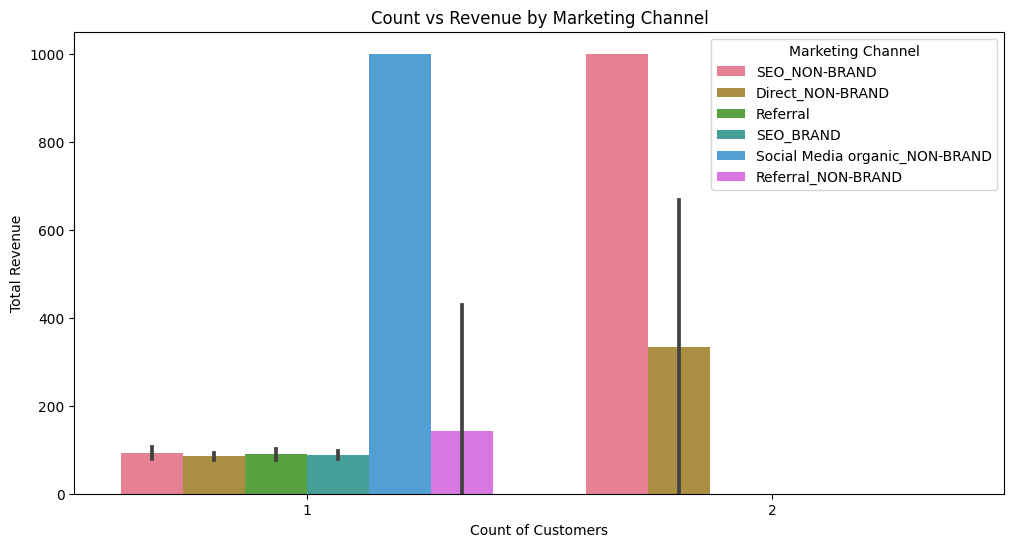

In [18]:

plt.figure(figsize=(12, 6))

sns.barplot(x='count', y='revenue', hue='MARKETINGCHANNEL', data=dstv_count_cookies, palette='husl', dodge=True)

plt.title('Count vs Revenue by Marketing Channel')
plt.xlabel('Count of Customers')
plt.ylabel('Total Revenue')
plt.legend(title='Marketing Channel', loc='upper right')

plt.show()

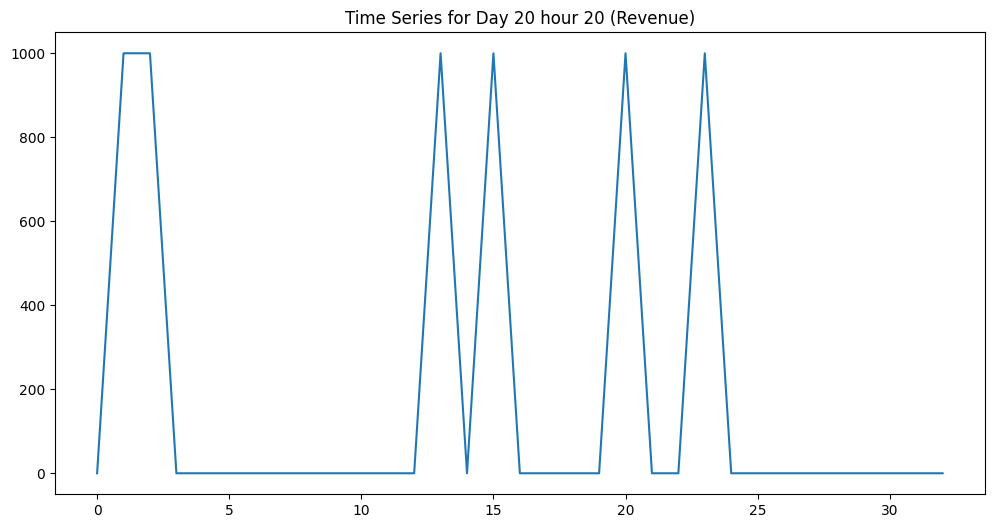

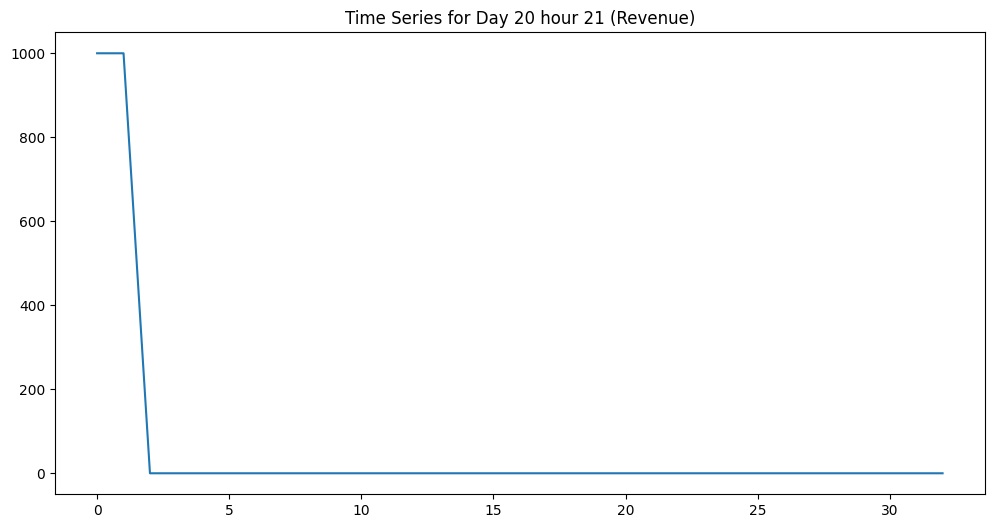

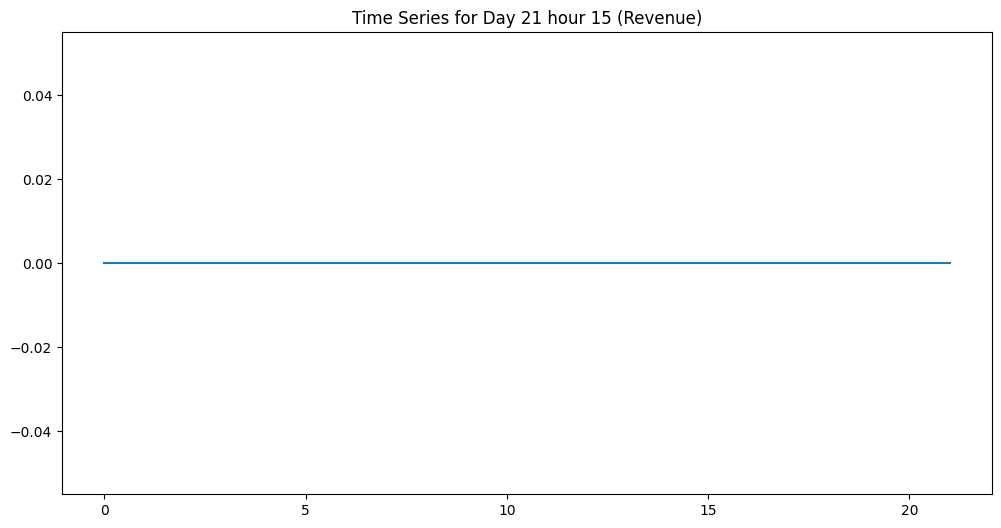

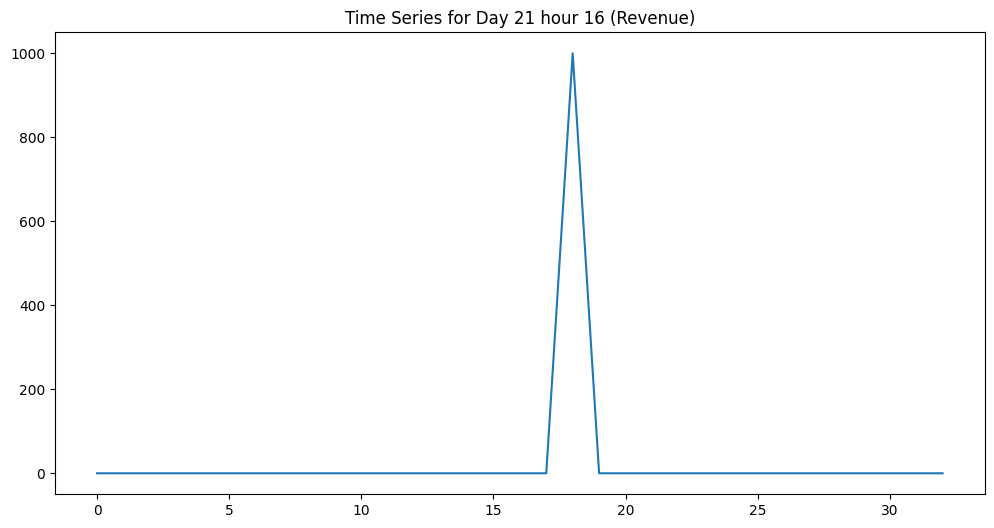

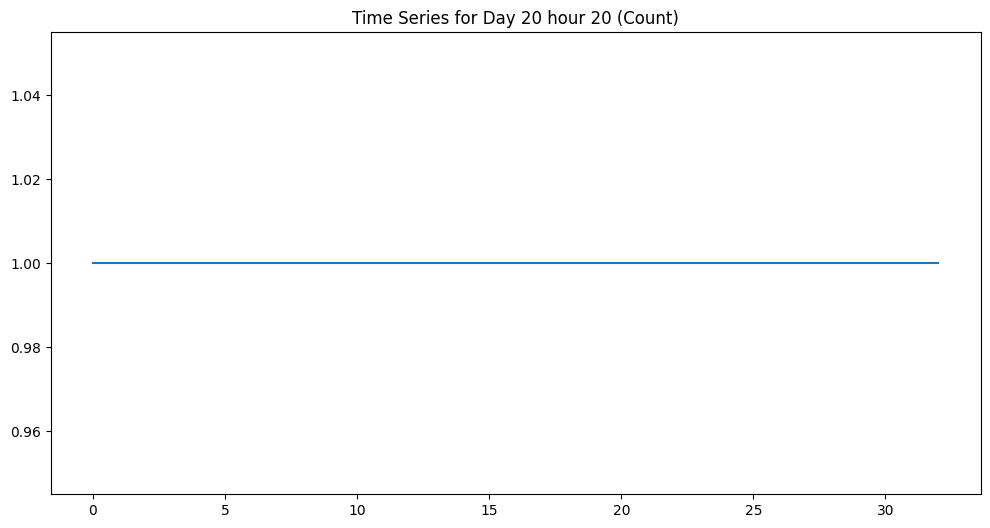

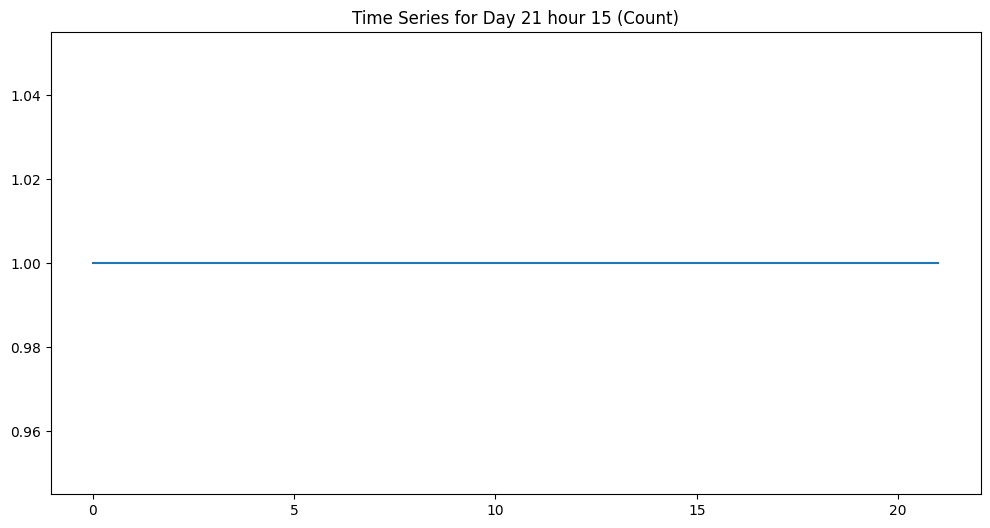

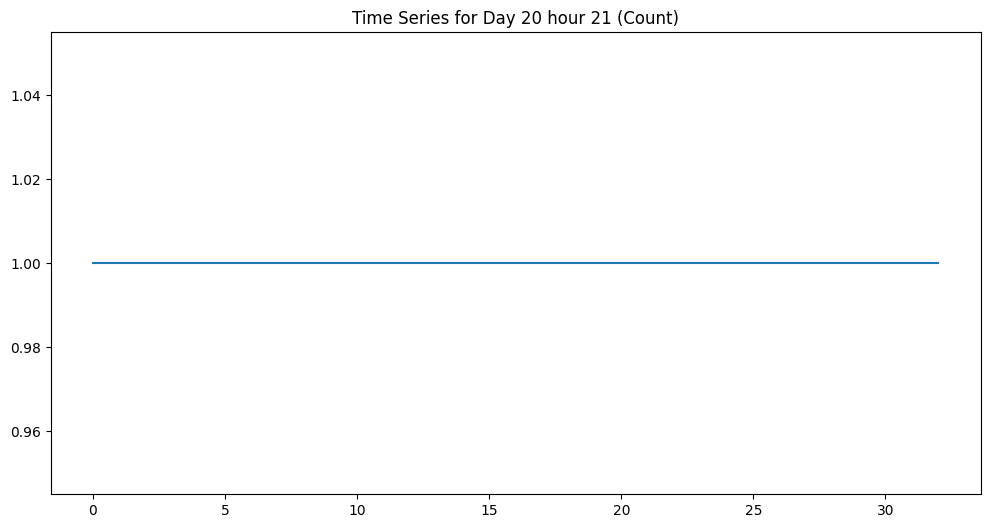

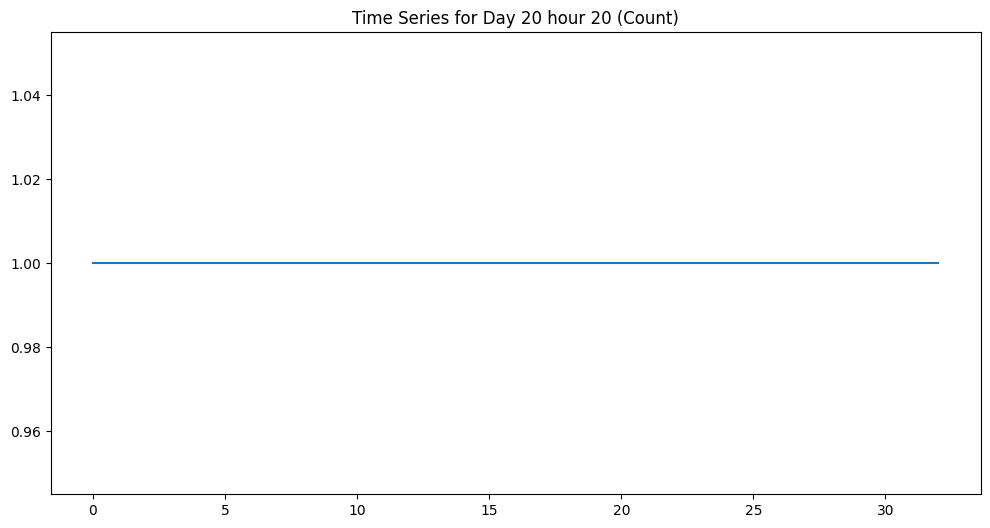

In [22]:

def plot_time_series(data, title):
    ts = pd.Series(data.values)
    plt.figure(figsize=(12, 6))
    plt.plot(ts)
    plt.title(title)
    plt.show()

# Investigating Day 20
granular_day20 = dstv_count_cookies[(dstv_count_cookies['day'] == 20)]

# Time Series for Day 20 hour 20 (Revenue)
plot_time_series(granular_day20[granular_day20['hour'] == 20]['revenue'], 'Time Series for Day 20 hour 20 (Revenue)')

# Time Series for Day 20 hour 21 (Revenue)
plot_time_series(granular_day20[granular_day20['hour'] == 21]['revenue'], 'Time Series for Day 20 hour 21 (Revenue)')

# Investigating Day 21
granular_day21 = dstv_count_cookies[(dstv_count_cookies['day'] == 21)]

# Time Series for Day 21 hour 15 (Revenue)
plot_time_series(granular_day21[granular_day21['hour'] == 15]['revenue'], 'Time Series for Day 21 hour 15 (Revenue)')

# Time Series for Day 21 hour 16 (Revenue)
plot_time_series(granular_day21[granular_day21['hour'] == 16]['revenue'], 'Time Series for Day 21 hour 16 (Revenue)')

# Time Series for Day 20 hour 20 (Count)
plot_time_series(granular_day20[granular_day20['hour'] == 20]['count'], 'Time Series for Day 20 hour 20 (Count)')

# Time Series for Day 21 hour 15 (Count)
plot_time_series(granular_day21[granular_day21['hour'] == 15]['count'], 'Time Series for Day 21 hour 15 (Count)')

# Time Series for Day 20 hour 21 (Count)
plot_time_series(granular_day20[granular_day20['hour'] == 21]['count'], 'Time Series for Day 20 hour 21 (Count)')

# Time Series for Day 20 hour 20 (Count)
plot_time_series(granular_day20[granular_day20['hour'] == 20]['count'], 'Time Series for Day 20 hour 20 (Count)')
